<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/innovaciones/blob/main/ref/geron/math_linear_algebra/linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/innovaciones/blob/main/ref/geron/math_linear_algebra/linear_algebra.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Clase 8 parcial 2

## [Video de apoyo]()

Página 388 del Boyce DiPrima 

# 7.5 Sistemas lineales homogéneos con coeficientes constantes 

## El problema
* Construir la solución general de un sistema de ecuaciones lineales homogéneas   
  con coeficientes constantes; es decir, un sistema de la forma 

$$ x' = Ax $$

donde $A$ es una matriz constante de $n \times n$. 

Por analogía con el tratamiento de las ecuaciones lineales de segundo orden en homogéneas, se buscan soluciones de $x' = Ax$ de la forma 

$$ x = \xi e^{rt}, $$

en donde deben determinarse el número real $r$ y el vector constante $\xi$. 

Si se sustituye $x = \xi e^{rt}$  en $x' = Ax$ se obtiene 

$$ r\xi e^{rt} = A\xi e^{rt} $$


Una vez que se cancela el factor escalar diferente de cero $e^{rt}$ se obtiene 

$$ A\xi = r\xi, $$

Introduzcamos la matriz identidad I
$$A\xi = rI\xi, \quad \quad \Rightarrow \quad \quad A\xi - rI\xi = 0 $$

o bien, 

$$ (A - rI)\xi = 0 $$

en donde $I$ es la matriz identidad de $n \times n$. 

para resolver el sistema de ecuaciones diferenciales $x' = Ax$, es necesario resolver el sistema de ecuaciones algebraicas 

$$ (A - rI)\xi = 0 $$


Este último problema es precisamente aquel en el que se determinan los **eigenvalores** y los **eigenvectores** de la matriz $A$. 

El vector $x$ dado por la ecuación $x = \xi e^{rt}$ es la solución de $x' = Ax$ en el supuesto de que $r$ sea un eigenvalor y $\xi$ un eigenvector asociados a la matriz de coeficientes $A$.  

## Ejemplo 1 
Página 389 

Encontrar la solución general del sistema 

$$ x' = \begin{pmatrix} 1 & 1 \\ 4 & 1 \end{pmatrix}x. $$


$$x = c_{1}\xi^{(1)}e^{r_{1}t} + c_{2}\xi^{(2)}e^{r_{2}t} $$

## Solución con numpy de Python 

In [1]:
import numpy as np 
from numpy import linalg as LA 

In [2]:
A = np.array([[1,1],[4,1]]) 
A 

array([[1, 1],
       [4, 1]])

In [3]:
LA.eig(A) 

(array([ 3., -1.]),
 array([[ 0.4472136 , -0.4472136 ],
        [ 0.89442719,  0.89442719]]))

In [4]:
w,v=LA.eig(A)


In [5]:
w 

array([ 3., -1.])

In [6]:
v 

array([[ 0.4472136 , -0.4472136 ],
       [ 0.89442719,  0.89442719]])

In [7]:
r1,r2=w[0],w[1] 

In [8]:
r1 

3.0000000000000004

In [9]:
r2 

-0.9999999999999996

In [10]:
xi1,xi2=v[:,0],v[:,1] 

In [11]:
xi1    

array([0.4472136 , 0.89442719])

In [12]:
xi2 

array([-0.4472136 ,  0.89442719])

In [13]:
LA.norm(xi1)  

1.0

In [14]:
c1=1
c2=0 
def x(t):
    return c1*xi1*np.exp(r1*t)+c2*xi2*np.exp(r2*t) 

## Visualización de la solución

In [15]:
def x1(t):
    return x(t)[0] 

In [16]:
def x2(t):
    return x(t)[1] 

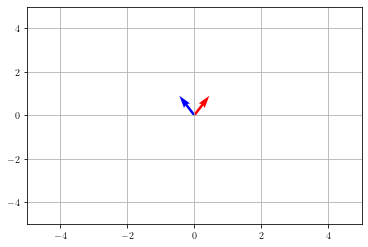

In [17]:
import numpy as np 
import matplotlib 
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt 
a=5 # dimensión del cuadrado de viasualización 
plt.quiver([0,0],[0,0], [xi1[0],xi2[0]],[xi1[1],xi2[1]],angles='xy',
           scale_units='xy', scale=1, color=['r','b'])
plt.grid() 
plt.axis([-a,a,-a,a])
plt.savefig('EigenVectores.jpg')

## Gráfica de algunas curvas integrales 

Supongamos que $c_{2} = 0$ 

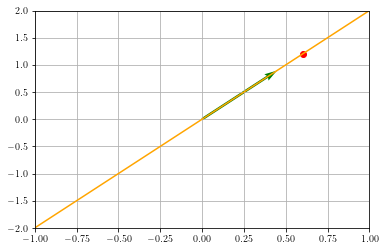

In [18]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interact 
T=np.linspace(-1,1) 


plt.scatter([x1(0.1)],[x2(0.1)], color='r') 
plt.plot(T,(xi1[1]/xi1[0])*T,color='orange') 
plt.grid() 
plt.quiver([0],[0],[xi1[0]],[xi1[1]], angles='xy', scale_units='xy', 
           scale=1, color=['g']) 
plt.axis([-1,1,-2,2])
plt.savefig('gaficasolucion.png')  
plt.show()



Es didácticamente necesario hacer enfasis en los procesos de visualización.  
Por ello haré muchos videos de formación para visualizar la solución de una sistema con matplotlib 

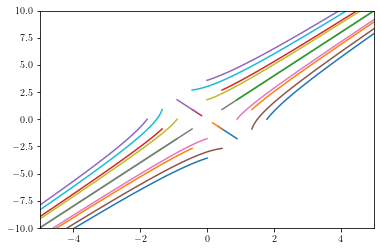

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
def x(t):
    return c1*xi1*np.exp(r1*t) +c2*xi2*np.exp(r2*t) 

def x1(t):
    return x(t)[0] 

def x2(t):
    return x(t)[1] 

for c1 in [-2,-1,0,1,2]:
    for c2 in [-2,-1,0,1,2]:
        T = np.linspace(0,1)   
        X1 = [x1(t) for t in T]
        X2 = [x2(t) for t in T]
        plt.axis([-5,5,-10,10])
        plt.plot(X1,X2)
plt.savefig('SoluSistema.jpg')        
plt.show()         

### Solución analítica:

Si se supone que $x = \xi e^{rt}$ y se sustituye $x$ en la ecuación anterior se llega al sistema de ecuaciones algebraicas 

$$ \begin{pmatrix} 1-r & 1 \\ 4 & 1-r \end{pmatrix} \begin{pmatrix} \xi_{1} \\ \xi_{2} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $$


El sistema anterior tiene solución que no sea trivial si y solo si el determinante de los coeficientes es cero. 

Por tanto, a partir de la ecuación 

\begin{align*}
\left| \begin{matrix}1-r & 1 \\ 4 & 1-r \end{matrix} \right|& = (1-r)^{2} - 4 \\
& r^{2} - 2r - 3 = 0
\end{align*}

se encuentran valores permisibles de $r$. 


Las raíces de la anterior ecuación son $r_{1}=3$ y $r_{2} = -1$, que son los eigenvalores de la matriz de coeficientes de la ecuación 

$$ x' = \begin{pmatrix} 1 & 1 \\ 4 & 1 \end{pmatrix}x. $$


Si $r = 3$, entonces el sistema 

$$ \begin{pmatrix} 1-r & 1 \\ 4 & 1-r \end{pmatrix} \begin{pmatrix} \xi_{1} \\ \xi_{2} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $$

se reduce a la simple ecuación 

$$-2\xi_{1} + \xi_{2} = 0 $$


Por tanto

$$\xi_{2} = 2\xi_{1}$$

y el eigenvector correspondiente a $r_{1} = 3$ puede tomarse como

$$\xi^{(1)} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}. $$


De manera semejante, correspondiendo a $r_{2} = -1$, se encuentra que 

$$\xi_{2} = -2\xi_{1}, $$

de modeo que el eigenvector es

$$ \xi^{(2)} = \begin{pmatrix} 1 \\ -2 \end{pmatrix} $$

Las soluciones correspondientes de la ecuación diferencial son

$$ x^{(1)}(t) = \begin{pmatrix} 1 \\ 2 \end{pmatrix}e^{3t}, \quad \quad x^{(2)}(t) = \begin{pmatrix} 1 \\ -2 \end{pmatrix}e^{-t}  $$


El wronskiano de estas soluciones es: 

$$W[x^{(1)}, x^{(2)}](t) = \left| \begin{matrix} e^{3t} & e^{-t} \\ 2e^{3t} & -2e^{-t} \end{matrix} \right| = -4e^{2t}, $$

que nunca es cero. 

Donde las soluciones $x^{(1)}$ y $x^{(2)}$ forman un conjunto fundamental y la solución general del sistema $$ x' = \begin{pmatrix} 1 & 1 \\ 4 & 1 \end{pmatrix}x. $$

es 

\begin{align*}
x & = c_{1}x^{(1)}(t) + c_{2}x^{(2)}(t) \\
& = c_{1}\begin{pmatrix} 1 \\ 2 \end{pmatrix}e^{3t} + c_{2}\begin{pmatrix} 1 \\ -2 \end{pmatrix}e^{-t}
\end{align*}

donde $c_{1}$ y $c_{2}$ son constantes arbitrarias. 

Para visualizar la solución anterior resulta útil considerar su gráfica en el plano $x_{1}x_{2}$ para varios valores de las constantes $c_{2}$ Y $c_{2}$. 

Se empieza con $x = c_{1}x^{(1)}(t)$, o en forma escalar, 

$$ x_{1} = c_{1}e^{3t} \qquad \quad \quad x_{2} = 2c_{1}e^{3t}. $$


Al eliminar $t$ entre estas dos ecuaciones, se ve que esta solución se encuentra sobre la resta

$$ x_{2} = 2x_{1} $$


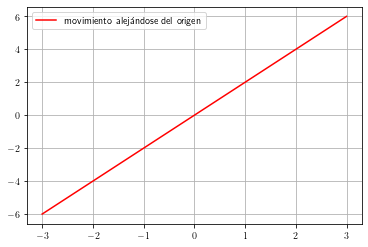

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
x1 = np.linspace(-3,3)
x2 = 2*x1 
y=plt.plot(x1,x2,'r-',label='movimiento alejándose del origen') 
# porque el vector posición tiende a ser de norma infinita
plt.legend() 
plt.grid() 
plt.show() 

Esta es la recta que pasa por el origen en la dirección del eigenvector $\xi^{(1)}$ 

Si la solución se considera como la trayectoria de una partícula en movimiento, entonces esta se encuentra en el primer cuadrante cuando $c_{1} > 0$ y en el tercero cuando $c_{1} < 0$. 

En cualquier caso, la partícula la partícula se aleja del origen a medida que $t$ crece. 

A continuación considérese 

$$ x = c_{2}x^{(2)}(t), $$

o bien 

$$ x_{1} = c_{2}e^{-t}, \quad \quad x_{2} = -2c_{2}e^{-t}.  $$


Esta solución está sobre la recta $x_{2} = -2x_{1}$, cuya dirección está determinada por el eigenvector $\xi^{(2)}$. 

La solución está en el cuartp cuadrante cuando $c_{2} > 0$ y en el segundo cuando $c_{2} < 0$. como se muestra en la siguiente figura. 

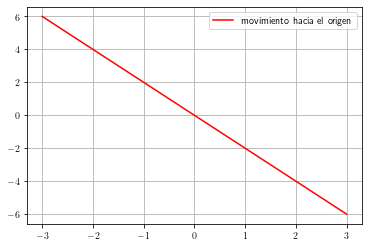

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
x1 = np.linspace(-3,3)
x2 = -2*x1 
y=plt.plot(x1,x2,'r-',label='movimiento hacia el origen')
# porque el vector posición tiende a ser de norma cero
plt.legend() 
plt.grid() 
plt.show() 

En los dos casos, la partícula se desplaza hacia el origen a medida que $t$ crece. 

La solución 

$$ x = c_{1}\begin{pmatrix} 1 \\ 2 \end{pmatrix}e^{3t} + c_{2}\begin{pmatrix} 1 \\ -2 \end{pmatrix}e^{-t} $$ 
es una combinación de $x^{(1)}(t)$ y $x^{(2)}(t)$. 

Para $t$ grande, el término $c_{1}x^{(1)}(t)$ es dominante y el término $c_{2}x^{(2)}(t)$ se vuelve despreciable. 

Por tanto, todas las soluciones para las que $c_{1} \neq 0$ son asíntóticas a la recta $x_{2} = 2x_{1}$ cuando $t \to \infty$. 

De manera semejante, todas las soluciones para las que $c_{2} \neq 0$ son asíntoticas a la recta $x_{2} = -2x_{1}$ cuando $t \to -\infty$.  

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 

def grafica(c1 = 1,c2 = 1,t = 0):
    x11=np.linspace(-10,10)
    x12 = 2*x11
    x21 = x11 
    x22 = -2*x21
    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.plot(x11,x12,x21,x22)
    ax.plot([c1*np.exp(3*t)+c2*np.exp(-t)],[2*c1*np.exp(3*t)-2*c2*np.exp(-t)],'go')
    ax.axis([-10,10,-10,10]) 
    plt.show() 
interact(grafica,c1=(-1,1),c2=(-1,1),t=(-1,3,0.01))      

interactive(children=(IntSlider(value=1, description='c1', max=1, min=-1), IntSlider(value=1, description='c2'…

<function __main__.grafica(c1=1, c2=1, t=0)>

El patrón de las trayectorias en esta figura es típico de todos los sistemas de segundo orden $x' = Ax$ para los que los eigen valores son reales y de signos opuestos.  En este caso el origen se llama **punto silla.**

En el párrafo anterior se describió la manera de trazar a mano una figura cualitativamente correcta de las trayectorias de un sistema como el de la ecuación 

$$ x' = \begin{pmatrix} 1 & 1 \\ 4 & 1 \end{pmatrix}x, $$

una vez que se determinan los eigenvalores y los eigenvectores. 


Sin embargo para producir una figura detallada y exacta como la anterior y otras que se presentarán posteriormente en este capítulo, una computadora es extremadamente útil, sino indispensable. 

## Alternativa de graficación (Cómo funciones de $t$) 

Como alternativa para la figura anterior también es posible trazar la gráfica de $x_{1}$ o $x_{2}$ como función de $t$. 

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 
a,b=0,2    # dominio 
def grafica(c1 = 1,c2 = 1):
    t=np.linspace(a,b)
    x1 =  c1/2*np.exp(3*t) + c2/2*np.exp(-t) 
    x2 =  2*c1/2*np.exp(3*t) -2*c2/2*np.exp(-t) 
    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.plot(t,x2)
    #ax.title('x1 contra t')
    ax.axis([a,b,-b-1,b+1]) 
    plt.grid() 
    plt.show() 
interact(grafica,c1=(-2,2),c2=(-3,3))    

interactive(children=(IntSlider(value=1, description='c1', max=2, min=-2), IntSlider(value=1, description='c2'…

<function __main__.grafica(c1=1, c2=1)>

En la figura anterior se muestran algunas gráficas típicas de $x1$ contra $t$, y las de $x_{2}$ contra $t$ son semejantes. 

Para ciertas condiciones iniciales, en la ecuación 

$$ x = c_{1}\begin{pmatrix} 1 \\ 2 \end{pmatrix}e^{3t} + c_{2}\begin{pmatrix} 1 \\ -2 \end{pmatrix}e^{-t} $$ 
se concluye que $c_{1} = 0$, de modo que $x_{1} = c_{2}e^{-t}$ y $x_{1} \to 0$ cuando $t \to \infty$. 

Una de estas gráficas se muestra en la figura anterior, correspondiente a una trayectoria que tiende al origen en la figura del plano $x1x2$. 

Sin embargo, para la mayor parte de las condiciones iniciales, $c_{1} \neq 0$ y $x_{1} = c_{1}e^{3t} + c_{2}e^{-t}$.  

Entonces, la presencia del término exponencial positivo hace que $x_{1}$ crezca exponencialmente en magnitud cuando $t$ crece. 

En la figura anterior se presentan gráficos de este tipo, correspondientes a trayectorias que se separan de la vecindad del origen en la figura en el plano $x_{1}x_{2}$.  

Es importante comprender la relación entre los gráficos en el plano $x_{1}x_{2}$ y en el plano $tx_{1}$ y otras figuras semejantes que se presentan después, ya que tal vez se deseen visualizar soluciones en el plano $x_{1}x_{2}$ o como funciones de la variable independiente $t$.  

Volviendo al sistema 

$$ x' = Ax, $$

se procede como en el ejemplo.


Para hallar soluciones de la ecuación diferencial 

$$x' = Ax$$

es necesario encontrar los eigenvalores y los eigenvectores de $A$, a partir del sistema algebraico 

$$ (A-rI)\xi = 0 $$


Los eigen valores $r_{1}, \ldots, r_{n}$ (que no necesariamente son todos diferentes) son raíces de la ecuación polinomial 

$$det(A-rI) = 0$$


La naturaleza de los eigenvalores y los eigenvectores correspondientes determina la naturaleza de la solución general del sistema $x' = Ax$. 

## Sistemas Hermitianos 

La situación es más sencilla cuando $A$ es una matriz **hermitiana**.  

Una matriz hermitiana (o hermítica, en honor a Charles Hermite) es una matriz cuadrada de elementos complejos que tiene la característica de ser igual a su propia traspuesta conjugada. 

Es decir, el elemento en la i-ésima fila y j-ésima columna es igual al conjugado del elemento en la j-ésima fila e i-ésima columna, para todos los índices i y j:

$$ a_{i,j} = \overline{a_{j,i}} $$

o, escrita con la traspuesta conjugada A*:

{\displaystyle A=(A^{T})^{*}\;}{\displaystyle A=(A^{T})^{*}\;}
Por ejemplo,

{\displaystyle A={\begin{bmatrix}3&2+i\\2-i&1\end{bmatrix}}}{\displaystyle A={\begin{bmatrix}3&2+i\\2-i&1\end{bmatrix}}}
es una matriz hermítica.

Como se hizo ver en la sección 7.3, en este caso todos los eigenvalores $r_{1}, \ldots, r_{n}$ son reales. 

Además, aún si alguno de los eigen valores están repetidos, siempre existe un conjunto de $n$ eigenvectores $\xi^{(1)}, \ldots, \xi^{(n)}$ que son linealmente independientes (de hecho, ortogonales). 

De donde, las soluciones correspondientes del sistema $x' = Ax$ son

$$ x^{(1)}(t) = \xi^{(1)}e^{r_{1}t}, \ldots, x^{(n)}(t) = \xi^{(n)}e^{r_{n}t} $$


Para demostrar que estas soluciones forman un conjunto fundamental se evalua su wronskiano:

\begin{align*}
W[x^{(1)}, \ldots, x^{(n)}](t) & = \left| \begin{matrix} \xi^{(1)}_{1}e^{r_{1}t} & \cdots & \xi^{(n)}_{1}e^{r_{n}t} \\ \vdots & & \vdots \\ \xi^{(1)}_{n}e^{r_{1}t} & \cdots & \xi^{(n)}_{n}e^{r_{n}t} \end{matrix} \right| \\
                               & = e^{(r_{1} + \cdots + r_{n})t} \left|\begin{matrix}
                               \xi^{(1)}_{1} & \cdots & \xi^{(n)} \\
                               \vdots & & \vdots \\ \xi^{(1)}_{n} & \cdots & \xi^{(n)}_{n}
                               \end{matrix}\right| 
\end{align*}

En primer lugar se observa que la función exponencial nunca es cero. 

En seguida, como los eigenvectores $\xi^{(1)},\ldots,\xi^{(n)}$ son linealmente independientes, el determinante del último término de la ecuación anterior es diferente de cero. 

Como consecuencia, el wronskiano $w[x^{(1)}, \ldots, x^{(n)}](t)$ nunca es cero, de donde $x^{(1)}, \ldots, x^{(n)}$ forman un conjunto fundamental de soluciones. 

Por tanto, cuando $A$ es una matriz hermitiana, la solución de la ecuación $x'=Ax$ es 

$$ x = c_{1}\xi^{(1)}e^{r_{1}t} + \cdots + c_{n}\xi^{(n)}e^{r_{n}t}. $$


Una subclase de las matrices hermitianas es la clase de las matrices reales simétricas. 

Si $A$ es una matriz real y simétrica, entonces todos sus eigenvectores $\xi^{(1)}, \ldots, \xi^{(n)}$, así como los eigenvalores $r_{1}, \ldots, r_{n}$ son reales. 

De donde, las soluciones dadas por la ecuación 

$$ x = c_{1}\xi^{(1)}e^{r_{1}t} + \cdots + c_{n}\xi^{(n)}e^{r_{n}t}. $$

son de valores reales. 

Sin embargo, si la matriz hermitiana $A$ no es real, entonces en general los eigenvectores tienen partes imaginarias diferentes de cero y las soluciones 

$$ x = c_{1}\xi^{(1)}e^{r_{1}t} + \cdots + c_{n}\xi^{(n)}e^{r_{n}t}. $$

son de valores complejos. 

## Ejemplo 2
Página 392 

Encontrar la solución general de

$$ x' = \begin{pmatrix} -3 & \sqrt{2} \\ \sqrt{2} & -2 \end{pmatrix}x $$


La matriz de coeficientes de la ecuación anterior es real y simétrica, de modo que los resultados recientemente descritos son válidos para este problema. 

Si se supone que $x = \xi e^{rt}$ se obtiene el sistema algebraico 

$$ \begin{pmatrix} -3 - r & \sqrt{2} \\ \sqrt{2} & -2-r \end{pmatrix} \begin{pmatrix} \xi_{1} \\ \xi_{2}\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $$


Los eigenvalores satisfacen 

\begin{align*}
(-3-r)(-2-r)-2 & = r^{2}+5r + 4 \\
& = (r+1)(r+4) = 0,
\end{align*}


de modo que $r_{1} = -1$, $r_{2}=-4$. 

Para $r = -1$, la ecuación 

$$ \begin{pmatrix} -3 - r & \sqrt{2} \\ \sqrt{2} & -2-r \end{pmatrix} \begin{pmatrix} \xi_{1} \\ \xi_{2}\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $$

queda 

$$ \begin{pmatrix} -2 & \sqrt{2} \\ \sqrt{2} & -1 \end{pmatrix} \begin{pmatrix} \xi_{1} \\ \xi_{2}\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} $$


De donde, $\xi_{2} = \sqrt{2}\xi_{1}$ y el eigenvector $\xi^{(1)}$ correspondiente al eigenvalor $r=-1$ puede tomarse como 

$$ \xi^{(1)} = \begin{pmatrix} 1 \\ \sqrt{2} \end{pmatrix} $$


De manera semejante, correspondiendo al eigenvalor $r_{2} = -4$ se tiene $\xi_{1} = -\sqrt{2}\xi_{2}$, por lo que el eigenvector es 

$$ \xi^{(2)} = \begin{pmatrix} -\sqrt{2} \\ 1 \end{pmatrix} $$


Por tanto, el conjunto fundamental de soluciones del sistema del sistema 

$$ x' = \begin{pmatrix} -3 & \sqrt{2} \\ \sqrt{2} & -2 \end{pmatrix}x $$

es 

$$ x^{(1)}(t) = \begin{pmatrix} 1 \\ \sqrt{2} \end{pmatrix}e^{-t}, \quad \quad x^{(2)}(t) = \begin{pmatrix} -\sqrt{2} \\ 1 \end{pmatrix}e^{-4t}  $$


y la solución general es 

$$ x = c_{1}x^{(1)}(t) + c_{2}x^{(2)}(t) = c_{1}\begin{pmatrix} 1 \\ \sqrt{2} \end{pmatrix}e^{-t} + c_{2}\begin{pmatrix} -\sqrt{2} \\ 1 \end{pmatrix}e^{-4t} $$


## Graficación de algunas de las curvas integrales 

### Graficación en el plano $x_{1}x_{2}$

Empecemos por $x = c_{1}x^{(1)}(t)$

$$ x = \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} = c_{1}x^{(1)}(t) =  c_{1}\begin{pmatrix} 1 \\ \sqrt{2} \end{pmatrix}e^{-t} $$

\begin{align*} 
x_{1} & = c_{1}e^{-t} \\
x_{2} & = c_{1}\sqrt{2}e^{-t}
\end{align*}


dividiendo lado a lado las ecuaciones anteriores obtenemos 

$$\frac{x_{1}}{x_{2}} = \frac{1}{\sqrt{2}} \quad \iff \quad x_{2} = \sqrt{2}x_{1} $$

en la siguiente figura se presenta el gráfico de esta recta: 

No handles with labels found to put in legend.


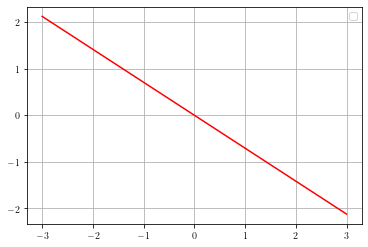

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
x1 = np.linspace(-3,3)
x2 = (-1/np.sqrt(2))*x1 
y=plt.plot(x1,x2,'r-',label='') 
# porque el vector posición tiende a ser de norma infinita
plt.legend() 
plt.grid() 
plt.show() 

Esta es la recta que pasa por el origen en la dirección del eigenvector 

$$ \xi^{(1)} = \begin{pmatrix} 1 \\ \sqrt{2} \end{pmatrix} $$


Si la solución se considera como la trayectoria de una partícula en movimiento, entonces esta se encuentra en el primer cuadrante cuando $c_{1} > 0$ y el el tercero cuando $c_{1} < 0$. 

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 
a,b=-3,3
def grafica(c1 = 1,t = 0):
    x1=np.linspace(-10,10)
    x2 = np.sqrt(2)*x1
    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.plot(x1,x2)
    ax.scatter([c1*np.exp(-t)],[np.sqrt(2)*c1*np.exp(-t)],color='r')
    c,d,e,f = a,b,a,b        # dimensiones del rectángulo de visualización
    ax.plot([0,0],[e,f])     # trazo del eje y
    ax.plot([a,b],[0,0])     # trazo del eje x
    ax.axis([c,d,e,f])  
    plt.grid() 
    plt.show() 
interact(grafica,c1=(-1,1),t=(0,3,0.1))    

interactive(children=(IntSlider(value=1, description='c1', max=1, min=-1), FloatSlider(value=0.0, description=…

<function __main__.grafica(c1=1, t=0)>

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 
a=2.5
def grafica(c1 = 1,c2 = 1,t = 0):
    x11 = np.linspace(-a,a)
    x12 = (-1/np.sqrt(2))*x11
    x21 = x11 
    x22 = np.sqrt(2)*x21
    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.plot(x11,x12,'b')
    ax.plot(x21,x22,'g')
    ax.set(xlabel='x1', ylabel='x2',
       title='Plano x1x2')
    ax.plot([-np.sqrt(2)*c1*np.exp(-4*t)+c2*np.exp(-t)],
            [c1*np.exp(-4*t)+np.sqrt(2)*c2*np.exp(-t)],'ro')
    ax.axis([-a,a,-a,a]) 
    plt.show() 
interact(grafica,c1=(-1,1),c2=(-1,1),t=(0.01,3,0.01))  

interactive(children=(IntSlider(value=1, description='c1', max=1, min=-1), IntSlider(value=1, description='c2'…

<function __main__.grafica(c1=1, c2=1, t=0)>

Cuando $c > 0$ la partícula se acerca al origen a  medida que $t$ crece. 

A continuación considérese $x = c_{2}x^{(2)}(t) = c_{2}\xi^{(2)}e^{r_{2}t}$. 

$$ x = c_{2}x^{(2)}(t) = c_{2}\begin{pmatrix} -\sqrt{2} \\ 1 \end{pmatrix}e^{-4t} $$


$$x = \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} = \begin{pmatrix} -c_{2}\sqrt{2}e^{-4t} \\ c_{2}e^{-4t} \end{pmatrix}   $$

 \begin{align*} 
 x_{1} & = -c_{2}\sqrt{2}e^{-4t} \\
 x_{2} & = c_{2}e^{-4t}
 \end{align*} 

Dividiendo lado a lado obtenemos: 

$$\frac{x_{1}}{x_{2}} = \frac{-\sqrt{2}}{1} \quad \iff \quad x_{2} = -\frac{1}{\sqrt{2}}x_{1} $$


In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 
a,b=-2,2
def grafica(c1 = 1,t = 0):
    x1=np.linspace(-10,10)
    x2 = (-1/np.sqrt(2))*x1
    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.plot(x1,x2)
    ax.plot([-np.sqrt(2)*c1*np.exp(-4*t)],[c1*np.exp(-4*t)],'ro')
    c,d,e,f = a,b,a,b        # dimensiones del rectángulo de visualización
    ax.plot([0,0],[e,f])     # trazo del eje y
    ax.plot([a,b],[0,0])     # trazo del eje x
    ax.axis([c,d,e,f])  
    plt.grid() 
    plt.show() 
interact(grafica,c1=(-1,1,2),t=(0,1,0.05))     

interactive(children=(IntSlider(value=1, description='c1', max=1, min=-1, step=2), FloatSlider(value=0.0, desc…

<function __main__.grafica(c1=1, t=0)>

Esta solución está sobre la recta $x_{2} = -\frac{1}{\sqrt{2}}x_{1}$ cuya dirección está determinada por el eigenvector $\xi^{(2)}$. 

Esta solución está en el segundo cuadrante cuando $c_{2} > 0$ y en el segundo cuando $c_{2} < 0$. 

En los dos casos la partícula se desplaza hacia el origen a medida que $t$ crece. 

La solución de 

$$ x' = \begin{pmatrix} -3 & \sqrt{2} \\ \sqrt{2} & -2 \end{pmatrix}x $$

es la combinación de $x^{(1)}(t)$ y $x^{(2)}(t)$ 

$$ x = c_{1}x^{(1)}(t) + c_{2}x^{(2)}(t) = c_{1}\begin{pmatrix} 1 \\ \sqrt{2} \end{pmatrix}e^{-t} + c_{2}\begin{pmatrix} -\sqrt{2} \\ 1 \end{pmatrix}e^{-4t} $$

Cuando $t \to \infty$, la solución $x^{(2)}(t)$ es despreciable en comparación con $x^{(1)}(t)$. 

Por tanto, a menos que $c_{1} = 0$, la solución 
$$ x = c_{1}x^{(1)}(t) + c_{2}x^{(2)}(t) = c_{1}\begin{pmatrix} 1 \\ \sqrt{2} \end{pmatrix}e^{-t} + c_{2}\begin{pmatrix} -\sqrt{2} \\ 1 \end{pmatrix}e^{-4t} $$
tiende al origen tangente a la recta $x_{2} = \sqrt{2}x_{2}$. 

El patrón de trayectorias que se muestre en esta figuras es típico de todos los sistemas de segundo orden $x' = Ax$ para los que los eigenvalores son reales, diferentes y desl mismo signo. 

El origen se conoce como nodo de un sistema de este tipo. 

## Trazado del movimiento de la partícula (Interpretación de las soluciones como trayectorias de una partícula en movimiento)

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 
a,b=-2.5,2.5 
def grafica(c1 = 1,c2 = 1,t = 0):
    x11=np.linspace(a,b)
    x12 = np.sqrt(2)*x11
    x21 = x11 
    x22 = -(1/np.sqrt(2))*x21
    fig,ax=plt.subplots(1,1,figsize=(6,6))
    ax.plot(x11,x12,x21,x22) 
    ax.plot([c1*np.exp(-t)-np.sqrt(2)*c2*np.exp(-4*t)],[np.sqrt(2)*c1*np.exp(-t)+c2*np.exp(-4*t)],'go')
    ax.axis([a,b,a,b]) # rectángulo de visualización 
    ax.grid() 
    plt.show() 
interact(grafica,c1=(-1,1),c2=(-1,1),t=(0,3,0.05))    

interactive(children=(IntSlider(value=1, description='c1', max=1, min=-1), IntSlider(value=1, description='c2'…

<function __main__.grafica(c1=1, c2=1, t=0)>

## Trazo de algunas trayectorias o curvas integrales 

$$ x = c_{1}x^{(1)}(t) + c_{2}x^{(2)}(t) = c_{1}\begin{pmatrix} 1 \\ \sqrt{2} \end{pmatrix}e^{-t} + c_{2}\begin{pmatrix} -\sqrt{2} \\ 1 \end{pmatrix}e^{-4t} $$

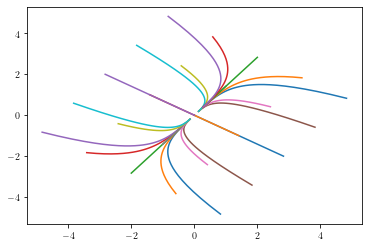

In [29]:
import numpy as np
import matplotlib.pyplot as plt 
for c1 in [-2,-1,0,1,2]:
    for c2 in [-2,-1,0,1,2]:
        T=np.linspace(0,2) 
        x1=[c1*np.exp(-t)-np.sqrt(2)*c2*np.exp(-4*t) for t in T]
        x2=[np.sqrt(2)*c1*np.exp(-t)+c2*np.exp(-4*t) for t in T]
        plt.plot(x1,x2)
plt.savefig('')        
plt.show()         

Si los eigenvalores fuesen positivos en vez de negativos, las trayectorias serían semejantes, pero estarían recorridas hacia afuera. 

Aunque la figura anterior se obtuvo en computadora, obsérvese que es posible trazar rápidamente a mano un esquema cualitativamente correcto de las trayectorias, con base en el conocimiento de los eigenvalores y los eigenvectores. 

## Gráficas de $x_{1}$ contra $t$ 

En la siguiente figura se muestren algunas gráficas típicas de $x_{1}$ contra $t$

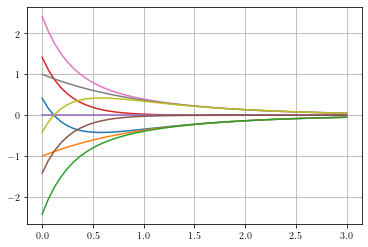

In [30]:
import numpy as np
import matplotlib.pyplot as plt 
for c1 in [-1,0,1]:
    for c2 in [-1,0,1]:
        T=np.linspace(0,3)  
        x1=[c1*np.exp(-t)-np.sqrt(2)*c2*np.exp(-4*t) for t in T]
        x2=[np.sqrt(2)*c1*np.exp(-t)+c2*np.exp(-4*t) for t in T]
        plt.plot(T,x1)
        plt.grid() 
plt.show()         

Obsérvese que cada una de las gráficas tiende asintóticamente al eje $t$ cuando $t$ crece, lo cual corresponde a una trayectoria que tiende al origen en las figuras anteriores. 

El comportamiento de $x_{2}$ como función de $t$ es semejente:


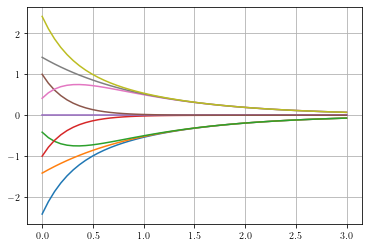

In [31]:
import numpy as np
import matplotlib.pyplot as plt 
for c1 in [-1,0,1]:
    for c2 in [-1,0,1]:
        T=np.linspace(0,3)  
        x1=[c1*np.exp(-t)-np.sqrt(2)*c2*np.exp(-4*t) for t in T]
        x2=[np.sqrt(2)*c1*np.exp(-t)+c2*np.exp(-4*t) for t in T]
        plt.plot(T,x2)
        plt.grid() 
plt.show()       

## Ejemplo 3
Página 394

Encontrar la solución general de 

$$ x' = \begin{pmatrix} 0 & 1 & 1 \\ 1 & 0 & 1 \\ 1 & 1 & 0 \end{pmatrix}x $$


De nuevo se observa se observa que la matriz de coeficientes es real y simétrica. 

Los eigen valores y los eigenvectores se encontraron en el ejemplo $5$ de la sección 7.3 (Página ); a saber

$$ r_{1} = 2, \quad \quad \xi^{(1)} = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} $$


$$ r_{2} = -1, \quad \quad \xi^{(2)} = \begin{pmatrix} 1 \\ 0 \\ -1 \end{pmatrix}, \quad \quad \quad r_{1} = -1, \quad \quad \xi^{(1)} = \begin{pmatrix} 0 \\ 1 \\ -1 \end{pmatrix}  $$

## Determinación de los eigenvalores y los eigenvectores con numpy 

In [32]:
from numpy import linalg as LA
w, v = LA.eig(np.array([[0,1,1],[1,0,1],[1,1,0]])) 
w,v 

(array([-1.,  2., -1.]),
 array([[-0.81649658,  0.57735027, -0.09265789],
        [ 0.40824829,  0.57735027, -0.65620994],
        [ 0.40824829,  0.57735027,  0.74886783]]))

De donde un conjunto fundamental de soluciones es

$$ x^{(1)}(t) = \begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}e^{2t}, \quad \quad x^{(2)}(t) = \begin{pmatrix} 1 \\ 0 \\ -1 \end{pmatrix}e^{-t}, \quad \quad x^{(3)}(t) = \begin{pmatrix} 0 \\ 1 \\ -1 \end{pmatrix}e^{-t} $$


La solución general es 

$$ x = c_{1}\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}e^{2t} + c_{2}\begin{pmatrix} 1 \\ 0 \\ -1 \end{pmatrix}e^{-t} + c_{3}\begin{pmatrix} 0 \\ 1 \\ -1 \end{pmatrix}e^{-t} $$



Este ejemplo ilustra el hecho de que aun cuando un eigenvalor ($r = -1$) tiene multiplicidad $2$, sigue siemdo posible encontrar dos eigenvectores linealmente independientes $\xi^{(1)}$ y $\xi^{(2)}$ y, como consecuencia, construir la solución general anterior. 

# Sistemas no hermitianos

Si la matriz de coeficientes del sistema 

$$ x' = Ax $$

no es hermitiana la situación referente a la solución es más complicada. 


Supóngase primero que $A$ es real, entonces para los eigenvalores de $A$ hay tres posibilidades: 




* Todos los eigenvalores son reales y distintos.
* Algunos eigenvalores ocurren en parejas conjugadas complejas
* Algunos eigenvalores se repiten. 

El primer caso no presenta dificultades. 

# numpy.linalg.eig

[numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

`linalg.eig(a)`  
Calcule los valores propios y los vectores propios rectos de una matriz cuadrada.

### Parámetros
una matriz (…, M, M)  
Matrices para las que se calcularán los valores propios y los vectores propios rectos

### Devoluciones
w (…, M) matriz  
Los valores propios, cada uno repetido según su multiplicidad. Los valores propios no están necesariamente ordenados. La matriz resultante será de tipo complejo, a menos que la parte imaginaria sea cero, en cuyo caso se convertirá en un tipo real. Cuando a es real, los valores propios resultantes serán reales (0 parte imaginaria) u ocurrirán en pares conjugados

matriz `v(…, M, M)`  
Los autovectores normalizados (unidad de "longitud"), de modo que la columna `v[:, i]` es el autovector correspondiente al autovalor `w[i]`.

### Mensajes de error 
LinAlgError  
Si el cálculo del valor propio no converge.

## Ver también

`eigvals`  
valores propios de una matriz no simétrica.

`eigh`  
valores propios y vectores propios de una matriz hermitiana (simétrica conjugada) simétrica o compleja real.

`eigvalsh`  
valores propios de una matriz hermitiana (simétrica conjugada) simétrica o compleja real.

`scipy.linalg.eig`  
Función similar en SciPy que también resuelve el problema de valores propios generalizados.

`scipy.linalg.schur`  
La mejor opción para matrices normales unitarias y otras no hermitianas.

## Notes

Nuevo en la versión 1.8.0.

Se aplican las reglas de transmisión; consulte la documentación de `numpy.linalg` para obtener más detalles.

Esto se implementa utilizando las rutinas _geev LAPACK que calculan los valores propios y los vectores propios de las matrices cuadradas generales.

El número $w$ es un valor propio de a si existe un vector $v$ tal que a @v = w *v. Por lo tanto, las matrices a, w y v satisfacen las ecuaciones $a @ v[:, i] = w[ i]* v[:, i]$ para $i \in \{0,...,M-1\}$.

La matriz $v$ de vectores propios puede no tener el rango máximo, es decir, algunas de las columnas pueden ser linealmente dependientes, aunque el error de redondeo puede ocultar ese hecho. 

Si los autovalores son todos diferentes, entonces, teóricamente, los autovectores son linealmente independientes y a se puede diagonalizar mediante una transformación de similitud usando $v$, es decir, $inv(v) @ a @ v$ es diagonal.

Para matrices normales no hermitianas, se prefiere la función SciPy `scipy.linalg.schur` porque se garantiza que la matriz $v$ es unitaria, lo que no es el caso cuando se usa `eig`. La factorización de Schur produce una matriz triangular superior en lugar de una matriz diagonal, pero para las matrices normales solo se necesita la diagonal de la matriz triangular superior, el resto es error de redondeo.

Finalmente, se enfatiza que $v$ consta de los vectores propios de la derecha (como en el lado derecho) de $a$.

Un vector y que satisface $y.T @ a = z * y.T$ para algún número $z$ se llama vector propio izquierdo de $a$ y, en general, los vectores propios izquierdo y derecho de la matriz $a$ no son necesariamente las transposiciones (quizás conjugadas) entre sí.

## References

G. Strang, Linear Algebra and Its Applications, 2nd Ed., Orlando, FL, Academic Press, Inc., 1980, Various pp.

## Ejemplos 